### Import modules and set up simulation

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

sim = rebound.Simulation()
sim.units = ('AU', 'yr', 'Msun')
sim.add(m=1.0)                  # star
sim.add(m=1e-5, a=1.0, e=0.02)  # inner planet
sim.add(m=1e-5, a=1.59, e=0.02) # outer planet near 2:1 resonance
sim.move_to_com()

### Integrate and track resonant angle

In [2]:
times = np.linspace(0, 2000, 4000)
phi_vals = []

for t in times:
    sim.integrate(t)
    p1, p2 = sim.particles[1], sim.particles[2]
    l1 = p1.l
    l2 = p2.l
    varpi1 = p1.pomega
    phi = 2*l2 - 1*l1 - varpi1   # 2:1 resonant angle
    phi_deg = np.degrees((phi + np.pi) % (2*np.pi) - np.pi)
    phi_vals.append(phi_deg)

### Plotting libration

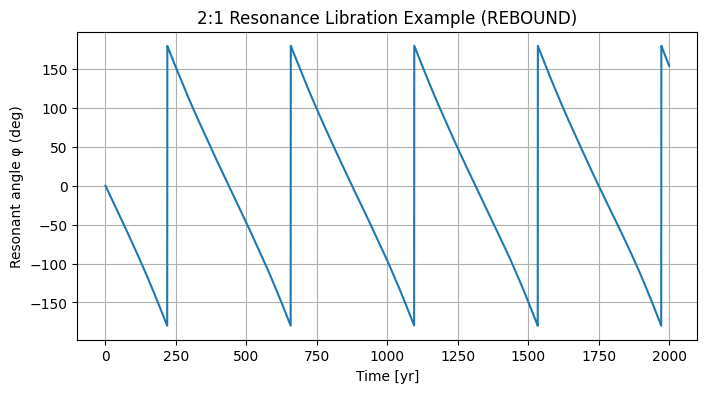

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(times, phi_vals)
plt.xlabel("Time [yr]")
plt.ylabel("Resonant angle φ (deg)")
plt.title("2:1 Resonance Libration Example (REBOUND)")
plt.grid(True)
plt.show()